In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
df_alpha = pd.read_csv("./alphadata.csv")
df_bravo = pd.read_csv("./bravodata.csv")

In [18]:
plt.rcParams["font.size"] = "15"

In [19]:
def find_insights(df):
    # create column that sums ST and RTT time
    df["ST + RTT"] = df["StartTime"] + df["RTT"]
    # shift the data one row up to get ST of the next request
    df["Next ST"] = df["StartTime"].shift(-1, axis=0)
    # find difference between ST + RTT and next ST to get real interval of consecutive measurement
    df["Interval"] = df["Next ST"] - df["ST + RTT"]

In [20]:
find_insights(df_alpha)
find_insights(df_bravo)

For `Bravo` dataset it can be seen that the `Interval` is spaced at a 20ms interval just as the rule suggests

In [28]:
df_bravo.head() 

,StartTime,RTT,ST + RTT,Next ST,Interval
0,628.000,0.013,628.013,628.033,0.020
1,628.033,0.016,628.049,628.069,0.020
2,628.069,0.018,628.087,628.108,0.021
3,628.108,0.014,628.122,628.143,0.021
4,628.143,0.014,628.157,628.177,0.020


For `Alpha` dataset it can be seen that the `Interval` is not spaced at a 20ms interval just as the rule suggests. The `Interval` column has very low values which cannot be the case.

In [25]:
df_alpha.head()

,StartTime,RTT,ST + RTT,Next ST,Interval
0,972.000000,0.011721,972.011721,972.020045,0.008323
1,972.020045,0.014769,972.034814,972.040120,0.005306
2,972.040120,0.013039,972.053159,972.060211,0.007052
3,972.060211,0.017491,972.077702,972.080281,0.002579
4,972.080281,0.015029,972.095310,972.100337,0.005027


In [44]:
df_alpha.describe()

,StartTime,RTT,ST + RTT,Next ST,Interval
count,30000.000000,30000.000000,30000.000000,29999.000000,29999.000000
mean,1272.741732,-0.090942,1272.650790,1272.751757,0.110996
std,173.642811,0.344485,173.549836,173.637023,0.344490
min,972.000000,-1.000000,971.541599,972.020045,-2.876433
25%,1122.368762,0.013814,1122.381105,1122.383810,0.003224
50%,1272.742157,0.015335,1272.778045,1272.752181,0.004718
75%,1423.114571,0.016825,1422.114571,1423.119594,0.006236
max,1573.484352,2.896496,1573.769629,1573.484352,1.020100


In [45]:
df_bravo.describe()

,StartTime,RTT,ST + RTT,Next ST,Interval
count,30000.000000,30000.000000,30000.000000,29999.000000,29999.000000
mean,1786.226160,-0.007354,1786.218806,1786.264769,0.083803
std,665.591172,0.190530,665.592729,665.568671,0.349968
min,628.000000,-1.000000,627.248000,628.033000,0.020000
25%,1188.256750,0.015000,1188.236500,1188.284000,0.020000
50%,1809.521500,0.016000,1810.058000,1809.715000,0.021000
75%,2356.820750,0.017000,2356.799750,2356.829500,0.021000
max,2921.369000,0.998000,2921.384000,2921.369000,2.021000


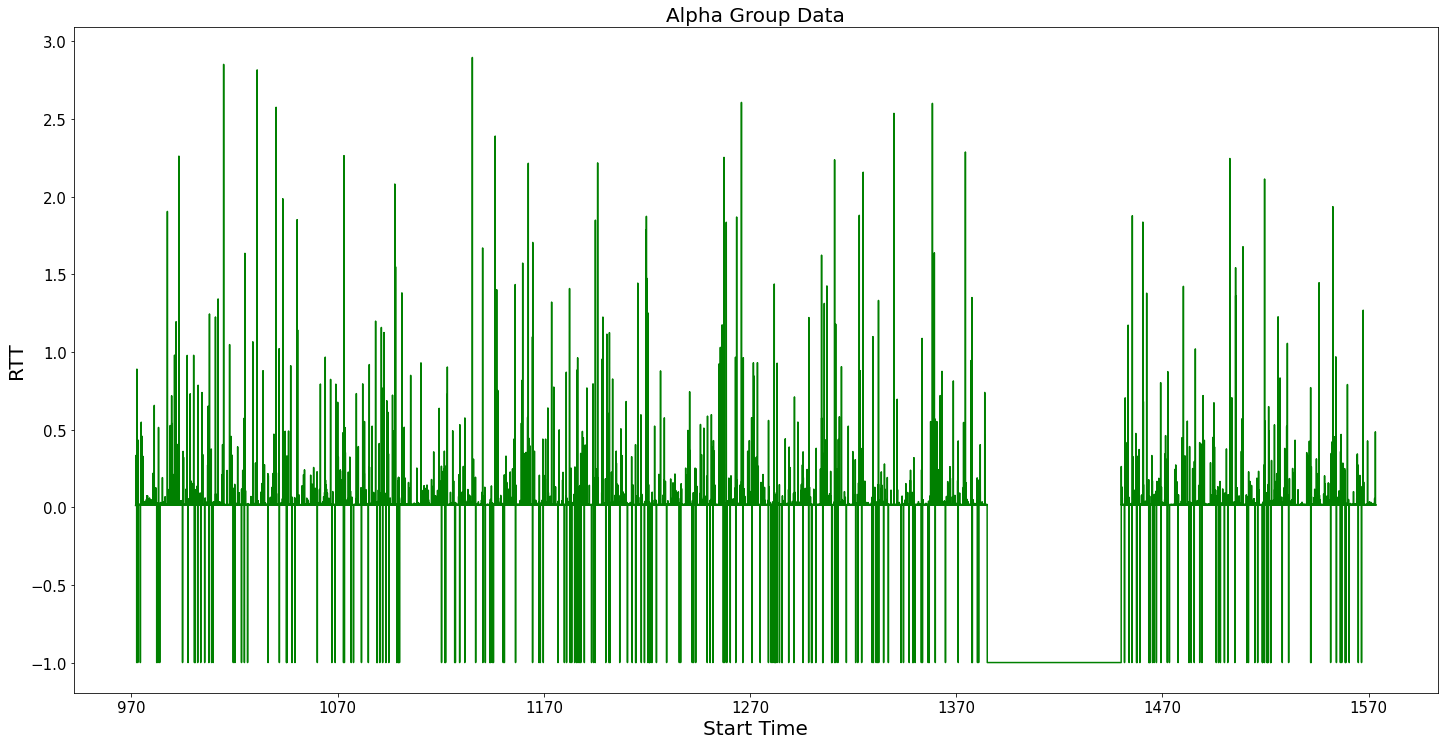

In [29]:
plt.figure(figsize=(20,10))
plt.plot(df_alpha["StartTime"], df_alpha["RTT"], color="g")
plt.xticks(np.arange(970, 1580, 100))
plt.tight_layout()
plt.title("Alpha Group Data", fontsize=20)
plt.xlabel("Start Time", fontsize=20)
plt.ylabel("RTT", fontsize=20)
plt.show()

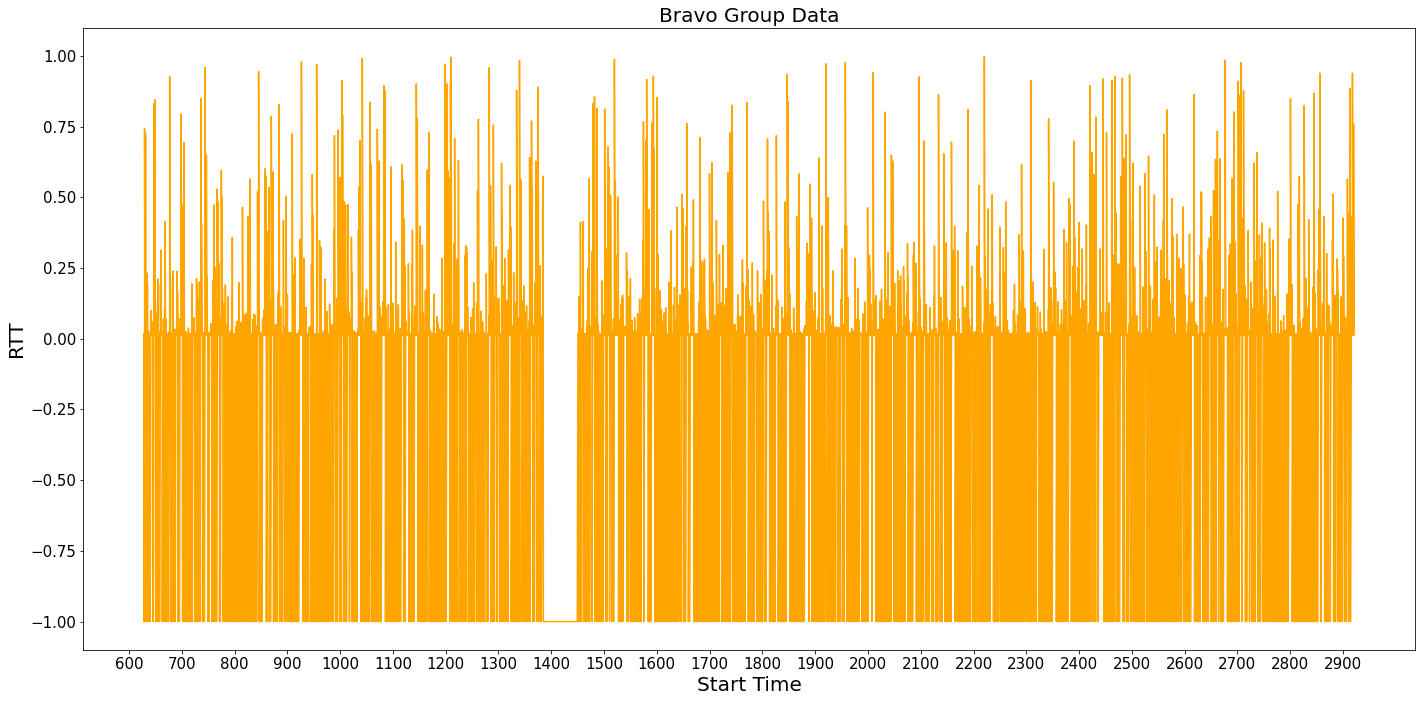

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df_bravo["StartTime"], df_bravo["RTT"], color="orange")
plt.xticks(np.arange(600, 3000, 100))
plt.title("Bravo Group Data", fontsize=20)
plt.xlabel("Start Time", fontsize=20)
plt.ylabel("RTT", fontsize=20)
plt.tight_layout()
plt.show()

As seen from the above graphs, we note that the `Start Time` range for `Alpha` is from approximately `970` to `1570` which is `600s` compared to the range of `Bravo` which is approximately from `600` to `2900` (`2300s`).

This is because `Alpha` is not following the rule that says the measurements must be spaced between `20ms`. It does not wait `20ms` _after_ the `RTT` is completed which makes it seem that its `RTT` is `0ms` which cannot be true, which explains the lesser range of `Start Time` for Alpha.

In [42]:
packets_lost_by_alpha = df_alpha["RTT"].value_counts().to_dict()[-1.0]
packets_lost_by_bravo = df_bravo["RTT"].value_counts().to_dict()[-1.0]

In [43]:
print(f"Packets lost by alpha = {packets_lost_by_alpha}")
print(f"Packets lost by bravo = {packets_lost_by_bravo}")

Packets lost by alpha = 3466
Packets lost by bravo = 949


As can be seen, packets lost by `Alpha` are far more greater than the packets lost by `Bravo`. 

## Conclusion

`Bravo` is better performing since it has less packet loss, it is more consistent and follows the `20ms` rule.